<a href="https://colab.research.google.com/github/Syahdant/Tubes4_Python_Syahdan/blob/main/Tubes4_Python_Syahdan_Triantoro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import numpy as np
import matplotlib.pyplot as plt

In [82]:
def Pathloss(frek, tipe_area, tinggi_pemancar, tinggi_penerima,jarak):
  if frek in range(150,1501):
    c1=69.55
    c2=26.16
  elif frek in range(1501,2001):
    c1=46.3
    c2=33.9

  if tipe_area == 'Urban':
    cm=0
  elif tipe_area == 'Suburban':
    cm= -2*((np.log10((frek/28)**2))-5.4)
  elif tipe_area == 'Open':
    cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
  else :
    cm='Wrong Tipe'

  ahr = (1.1*np.log10(frek)-0.7)*tinggi_penerima-(1.56*np.log10(frek)-1.8)
  Lp = c1 + (c2*np.log10(frek))-(13.83*np.log(tinggi_pemancar))-ahr+((44.9-6.55*np.log10(tinggi_pemancar))*np.log10(jarak))-cm

  return Lp

In [83]:
def dayaTerima(ptx, PL, Gtx, Grx):
  ptx=10*np.log10(ptx)
  prx=ptx - PL + Gtx + Grx
  prx=10**(prx/10)

  return prx

In [84]:
f=1800
Gtx=10
Grx=2
loc1='Urban'
loc2='Suburban'
loc3= 'Open'
trans = 80
rece = 1.5
jmin = 300
jmax = 1000
user = 200
j = np.random.randint(jmin,jmax,user)

In [85]:
Graph1=dayaTerima(30000,Pathloss(f,loc1,trans,rece,j),Gtx,Grx)
Graph2=dayaTerima(30000,Pathloss(f,loc2,trans,rece,j),Gtx,Grx)
Graph3=dayaTerima(30000,Pathloss(f,loc3,trans,rece,j),Gtx,Grx)

In [86]:
j_sort=j[np.argsort(j)]
Urban_sort=Graph1[np.argsort(j)]
Suburban_sort=Graph2[np.argsort(j)]
Open_sort=Graph3[np.argsort(j)]

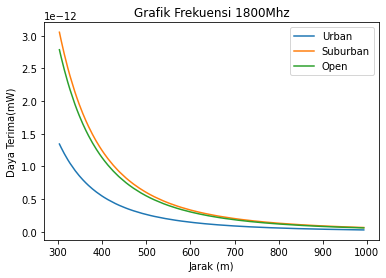

In [87]:
plt.figure()
plt.plot(j_sort,Urban_sort,label="Urban")
plt.plot(j_sort,Suburban_sort,label="Suburban")
plt.plot(j_sort,Open_sort,label="Open")
plt.legend()
plt.title("Grafik Frekuensi 1800Mhz")
plt.xlabel("Jarak (m)")
plt.ylabel("Daya Terima(mW)")
plt.show()

In [88]:
f1=700
f2=900
f3=1800
Gtx=10
Grx=2
loc='Urban'
trans = 80
rece = 1.5
jmin = 300
jmax = 1000
user = 200
j = np.random.randint(jmin,jmax,user)

In [89]:
GraphFrek1=dayaTerima(30000,Pathloss(f1,loc,trans,rece,j),Gtx,Grx)
GraphFrek2=dayaTerima(30000,Pathloss(f2,loc,trans,rece,j),Gtx,Grx)
GraphFrek3=dayaTerima(30000,Pathloss(f3,loc,trans,rece,j),Gtx,Grx)

In [90]:
j_sort=j[np.argsort(j)]
frek1_sort=GraphFrek1[np.argsort(j)]
frek2_sort=GraphFrek2[np.argsort(j)]
frek3_sort=GraphFrek3[np.argsort(j)]

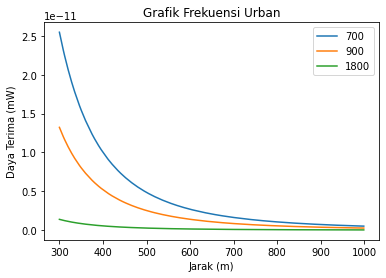

In [91]:
plt.figure()
plt.plot(j_sort,frek1_sort,label="700")
plt.plot(j_sort,frek2_sort,label="900")
plt.plot(j_sort,frek3_sort,label="1800")
plt.legend()
plt.title("Grafik Frekuensi Urban")
plt.xlabel("Jarak (m)")
plt.ylabel("Daya Terima (mW)")
plt.show()

In [92]:
def SNR(dt,Bw):
  ns= -174 + 10*np.log10(Bw)
  ns= 10**(ns/10)
  snr= dt/ns

  return snr

In [93]:
f=1800
Gtx=10
Grx=2
loc1='Urban'
loc2='Suburban'
loc3= 'Open'
trans = 80
rece = 1.5
jmin = 300
jmax = 1000
user = 200
j = np.random.randint(jmin,jmax,user)

In [94]:
Graph1=SNR(dayaTerima(30000,Pathloss(f,loc1,trans,rece,j),Gtx,Grx),5000000)
Graph2=SNR(dayaTerima(30000,Pathloss(f,loc2,trans,rece,j),Gtx,Grx),5000000)
Graph3=SNR(dayaTerima(30000,Pathloss(f,loc3,trans,rece,j),Gtx,Grx),5000000)

In [95]:
j_sort=j[np.argsort(j)]
Urban_sort=Graph1[np.argsort(j)]
Suburban_sort=Graph2[np.argsort(j)]
Open_sort=Graph3[np.argsort(j)]

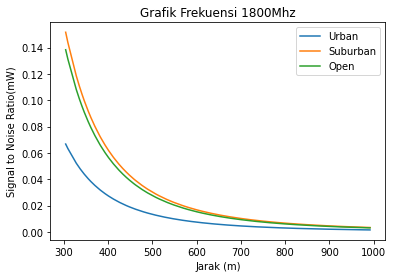

In [96]:
plt.figure()
plt.plot(j_sort,Urban_sort,label="Urban")
plt.plot(j_sort,Suburban_sort,label="Suburban")
plt.plot(j_sort,Open_sort,label="Open")
plt.legend()
plt.title("Grafik Frekuensi 1800Mhz")
plt.xlabel("Jarak (m)")
plt.ylabel("Signal to Noise Ratio(mW)")
plt.show()

In [97]:
f1=700
f2=900
f3=1800
Gtx=10
Grx=2
loc='Urban'
trans = 80
rece = 1.5
jmin = 300
jmax = 1000
user = 200
j = np.random.randint(jmin,jmax,user)

In [98]:
GraphFrek1=Kapasitas_celluler(Bw,SNR(dayaTerima(30000,Pathloss(f1,loc,trans,rece,j),Gtx,Grx),Bw))
GraphFrek2=Kapasitas_celluler(Bw,SNR(dayaTerima(30000,Pathloss(f2,loc,trans,rece,j),Gtx,Grx),Bw))
GraphFrek3=Kapasitas_celluler(Bw,SNR(dayaTerima(30000,Pathloss(f3,loc,trans,rece,j),Gtx,Grx),Bw))

In [101]:
j_sort=j[np.argsort(j)]
frek1_sort=GraphFrek1[np.argsort(j)]
frek2_sort=GraphFrek2[np.argsort(j)]
frek3_sort=GraphFrek3[np.argsort(j)]

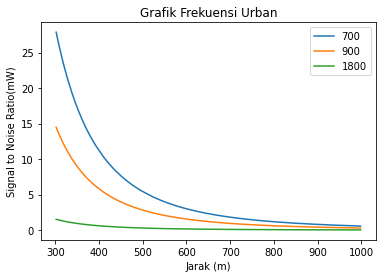

In [102]:
plt.figure()
plt.plot(j_sort,frek1_sort,label="700")
plt.plot(j_sort,frek2_sort,label="900")
plt.plot(j_sort,frek3_sort,label="1800")
plt.legend()
plt.title("Grafik Frekuensi Urban")
plt.xlabel("Jarak (m)")
plt.ylabel("Signal to Noise Ratio(mW)")
plt.show()

In [103]:
def Kapasitas_celluler(Sn,Bandwith):
  kc= Bandwith * np.log2(1+Sn)

  return kc

In [104]:
f=1800
Gtx=10
Grx=2
Bw=5000000
loc1='Urban'
loc2='Suburban'
loc3= 'Open'
trans = 80
rece = 1.5
jmin = 300
jmax = 1000
user = 200
j = np.random.randint(jmin,jmax,user)

In [105]:
Graph1=Kapasitas_celluler(Bw,SNR(dayaTerima(30000,Pathloss(f,loc1,trans,rece,j),Gtx,Grx),Bw))
Graph2=Kapasitas_celluler(Bw,SNR(dayaTerima(30000,Pathloss(f,loc2,trans,rece,j),Gtx,Grx),Bw))
Graph3=Kapasitas_celluler(Bw,SNR(dayaTerima(30000,Pathloss(f,loc3,trans,rece,j),Gtx,Grx),Bw))

In [106]:
j_sort=j[np.argsort(j)]
Urban_sort=Graph1[np.argsort(j)]
Suburban_sort=Graph2[np.argsort(j)]
Open_sort=Graph3[np.argsort(j)]

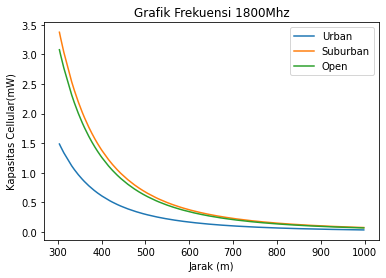

In [107]:
plt.figure()
plt.plot(j_sort,Urban_sort,label="Urban")
plt.plot(j_sort,Suburban_sort,label="Suburban")
plt.plot(j_sort,Open_sort,label="Open")
plt.legend()
plt.title("Grafik Frekuensi 1800Mhz")
plt.xlabel("Jarak (m)")
plt.ylabel("Kapasitas Cellular(mW)")
plt.show()

In [108]:
f1=700
f2=900
f3=1800
Gtx=10
Grx=2
Bw=5000000
loc='Urban'
trans = 80
rece = 1.5
jmin = 300
jmax = 1000
user = 200
j = np.random.randint(jmin,jmax,user)

In [109]:
GraphFrek1=Kapasitas_celluler(Bw,SNR(dayaTerima(30000,Pathloss(f1,loc,trans,rece,j),Gtx,Grx),Bw))
GraphFrek2=Kapasitas_celluler(Bw,SNR(dayaTerima(30000,Pathloss(f2,loc,trans,rece,j),Gtx,Grx),Bw))
GraphFrek3=Kapasitas_celluler(Bw,SNR(dayaTerima(30000,Pathloss(f3,loc,trans,rece,j),Gtx,Grx),Bw))

In [111]:
j_sort=j[np.argsort(j)]
frek1_sort=GraphFrek1[np.argsort(j)]
frek2_sort=GraphFrek2[np.argsort(j)]
frek3_sort=GraphFrek3[np.argsort(j)]

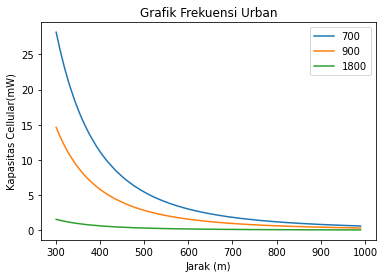

In [112]:
plt.figure()
plt.plot(j_sort,frek1_sort,label="700")
plt.plot(j_sort,frek2_sort,label="900")
plt.plot(j_sort,frek3_sort,label="1800")
plt.legend()
plt.title("Grafik Frekuensi Urban")
plt.xlabel("Jarak (m)")
plt.ylabel("Kapasitas Cellular(mW)")
plt.show()